In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_validate
from sklearn.metrics import f1_score, accuracy_score
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [81]:
df = pd.read_csv('seeds.csv')
y = df.Class
df = df.drop(['Class'], axis=1)
# df = df.drop(['Id'], axis=1)
# X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
# print(X_train.head())
def scale_dataset(dataset):
    scaler = preprocessing.MinMaxScaler()
    vals = dataset.values
    scaled_vals = scaler.fit_transform(vals)
    return pd.DataFrame(scaled_vals, columns = dataset.columns)
df = scale_dataset(df)
# X_train = scale_dataset(X_train)
# X_test = scale_dataset(X_test)
# plt.scatter(X_train['kernel_length'], X_train['kernel_width'], c=y_train)
# plt.show()
df.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry,kernel_groove_length
0,0.440982,0.502066,0.570780,0.486486,0.486101,0.189302,0.345150
1,0.405099,0.446281,0.662432,0.368806,0.501069,0.032883,0.215165
2,0.349386,0.347107,0.879310,0.220721,0.503920,0.251453,0.150665
3,0.306893,0.316116,0.793103,0.239302,0.533856,0.194243,0.140817
4,0.524079,0.533058,0.864791,0.427365,0.664291,0.076701,0.322994


In [3]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7467532467532467

## SKFolds

euclidean uniform 0.901 0.905 0.928 6
euclidean distance 0.918 0.919 0.933 8
manhattan uniform 0.907 0.910 0.928 12
manhattan distance 0.912 0.914 0.928 12
chebyshev uniform 0.927 0.929 0.933 11
chebyshev distance 0.927 0.929 0.933 14


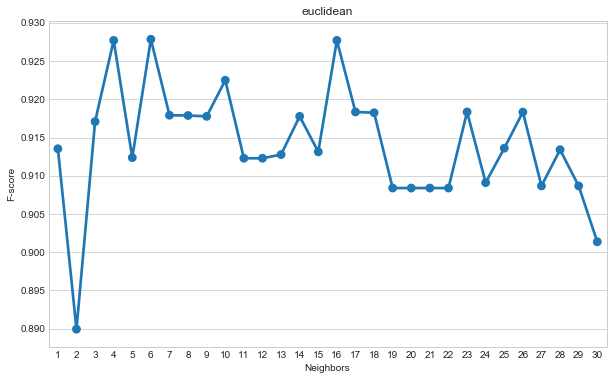

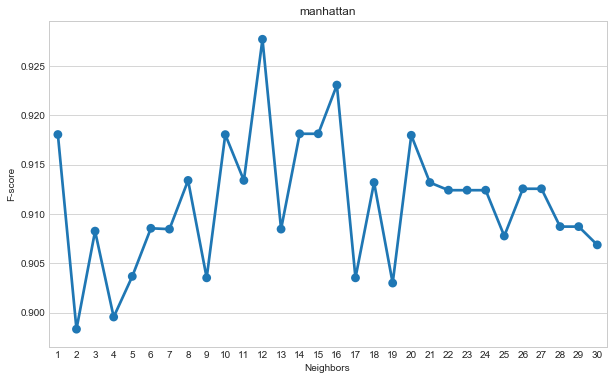

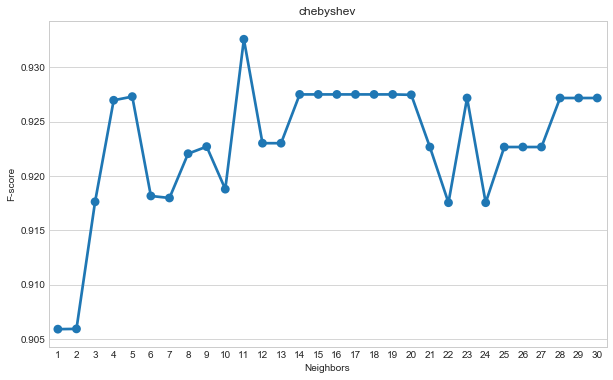

In [82]:
weights_arr = ['uniform', 'distance']
metrics_arr = ['euclidean', 'manhattan', 'chebyshev']
folds = 10
neighbors = np.arange(1,31)
skf = StratifiedKFold(n_splits=folds)
# skf = KFold(n_splits=folds)
f1_dict = {}
acc_dict = {}
for metr in metrics_arr:
    for weight in weights_arr:
        f1_dict = {}
        acc_dict = {}
        for n in neighbors:
            model = KNeighborsClassifier(n_neighbors=n, weights=weight, metric=metr)
            scoring = {'acc': 'accuracy', 'f1': 'f1_macro'}
            fit = cross_validate(model, df, y, scoring=scoring, cv=skf, return_train_score=True)
            f1_dict[n] = (sum(fit['test_f1'])/folds)
            acc_dict[n] = (sum(fit['test_acc'])/folds)
        max_index = 0
        max_val = 0
        keys = []
        vals = []
        for i in f1_dict.items():
            keys.append(i[0])
            vals.append(i[1])
            if i[1] > max_val:
                max_val = i[1]
                max_index = i[0]
        print('%s %s %.3f %.3f %.3f %s' % (metr, weight, sum(fit['test_f1'])/folds, sum(fit['test_acc'])/folds, max_val, max_index))

f1_dict = {}
acc_dict = {}
for metr in metrics_arr:
    for n in neighbors:
        model = KNeighborsClassifier(n_neighbors=n, weights='uniform', metric=metr)
        scoring = {'acc': 'accuracy', 'f1': 'f1_macro'}
        fit = cross_validate(model, df, y, scoring=scoring, cv=skf, return_train_score=True)
        f1_dict[n] = (sum(fit['test_f1'])/folds)
        acc_dict[n] = (sum(fit['test_acc'])/folds)
    max_index = 0
    max_val = 0
    keys = []
    vals = []
    for i in f1_dict.items():
        keys.append(i[0])
        vals.append(i[1])
        if i[1] > max_val:
            max_val = i[1]
            max_index = i[0]
    plt.subplots(figsize=(10,6))
    plt.title(metr)
    plt.xlabel('Neighbors')
    plt.ylabel('F-score')
    sns.pointplot(keys, vals)
    plt.show()

# f1_dict = {}
# acc_dict = {}
# for weight in weights_arr:
#     for n in neighbors:
#         model = KNeighborsClassifier(n_neighbors=n, weights=weight, metric='euclidean')
#         scoring = {'acc': 'accuracy', 'f1': 'f1_macro'}
#         fit = cross_validate(model, df, y, scoring=scoring, cv=skf, return_train_score=True)
#         f1_dict[n] = (sum(fit['test_f1'])/folds)
#         acc_dict[n] = (sum(fit['test_acc'])/folds)
#     max_index = 0
#     max_val = 0
#     keys = []
#     vals = []
#     for i in f1_dict.items():
#         keys.append(i[0])
#         vals.append(i[1])
#         if i[1] > max_val:
#             max_val = i[1]
#             max_index = i[0]
#     plt.subplots(figsize=(10,6))
#     plt.title(weight)
#     plt.xlabel('Neighbors')
#     plt.ylabel('F-score')
#     sns.pointplot(keys, vals)
#     plt.show()


# max_index = 0
# max_val = 0
# keys = []
# vals = []
# for i in f1_dict.items():
#     keys.append(i[0])
#     vals.append(i[1])
#     if i[1] > max_val:
#         max_val = i[1]
#         max_index = i[0]

# plt.subplots(figsize=(10,6))
# sns.pointplot(keys, vals)
# print('N:%s Val:%.3f' % (max_index, max_val))
# print('avg F1:', sum(fit['test_f1'])/folds)
# print('avg Acc:', sum(fit['test_acc'])/folds)
# print('Waga Metryka odl. Średni F-score Średni Accuracy Najlepszy F-score Optymalne K')


dict_values([0.8391488779419813, 0.8391488779419813, 0.7874247400109469, 0.7874247400109469, 0.7835933223864259, 0.7835933223864259, 0.7837301587301588, 0.7855774493705528, 0.7855774493705528, 0.7855774493705528, 0.7837301587301588, 0.7837301587301588, 0.7837301587301588, 0.7857142857142858, 0.7857142857142858, 0.7857142857142858, 0.7857142857142858, 0.7857142857142858, 0.7506265664160401, 0.7857142857142858, 0.7857142857142858, 0.7875615763546798, 0.7875615763546798, 0.7875615763546798, 0.7875615763546798, 0.7875615763546798, 0.7524738570564342, 0.7875615763546798, 0.7875615763546798, 0.7857142857142858])


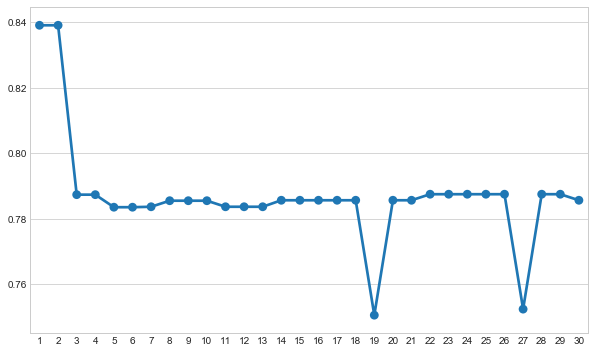

In [39]:
print(f1_dict.values())
indexes = []
vals = []
for i in range(1,31):
    indexes.append(i)
    vals.append(f1_dict[i])
plt.subplots(figsize=(10,6))
sns.pointplot(indexes, vals)

## Titanic

In [5]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')
train['Sex'] = train['Sex'].map({'male':1, 'female':0}).astype(int)
test['Sex'] = test['Sex'].map({'male':1, 'female':0}).astype(int)
train = train.fillna(0)
test = test.fillna(0)
temp = train.values
scaler = preprocessing.MinMaxScaler()
train.head()
# temp_scaled = scaler.fit_transform(temp)
# train = pd.DataFrame(temp_scaled)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,S
